In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy import spatial
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.cm as cm
import emcee
import corner
import pdb

In [4]:
def schechter(theta, M):
    phi_s, M_s, alpha = theta
    phi_s *= 1e-3
    #pdb.set_trace()
    n = 0.4 * np.log(10) * phi_s * 10**(0.4*(M_s-M)*(alpha+1)) * np.exp(-10**(0.4*(M_s - M)))
    return n

def ln_prior(theta):
    phi_s, M_s, alpha = theta
    if alpha>0 or alpha<-5:
        return -1e100
    elif M_s>0 or M_s<-40:
        return -1e100
    else:
        return 0

def ln_likelihood(theta, M, n_obs, ne_obs):
    n_model = schechter(theta, M)
    chi2 = -np.sum(((n_model - n_obs)/ne_obs)**2)
    return chi2

def ln_posterior(theta, M, n_obs, ne_obs):
    return ln_prior(theta) + ln_likelihood(theta, M, n_obs, ne_obs)

# run mcmc to get the best fit quadratic function
def mcmc_schechter(theta0, M, n_obs, ne_obs):
    steps = 1000
    nwalkers = 100
    ndim = 3
    pos = [np.random.normal((theta0), (1, 1, 0.1)) for i in range(nwalkers)]
    sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(M, n_obs, ne_obs))
    sampler.run_mcmc(pos, steps)
    samples = sampler.chain.reshape((-1, ndim))
    corner.corner(samples, labels=['phi_s', 'M_s', 'alpha'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
    print('')

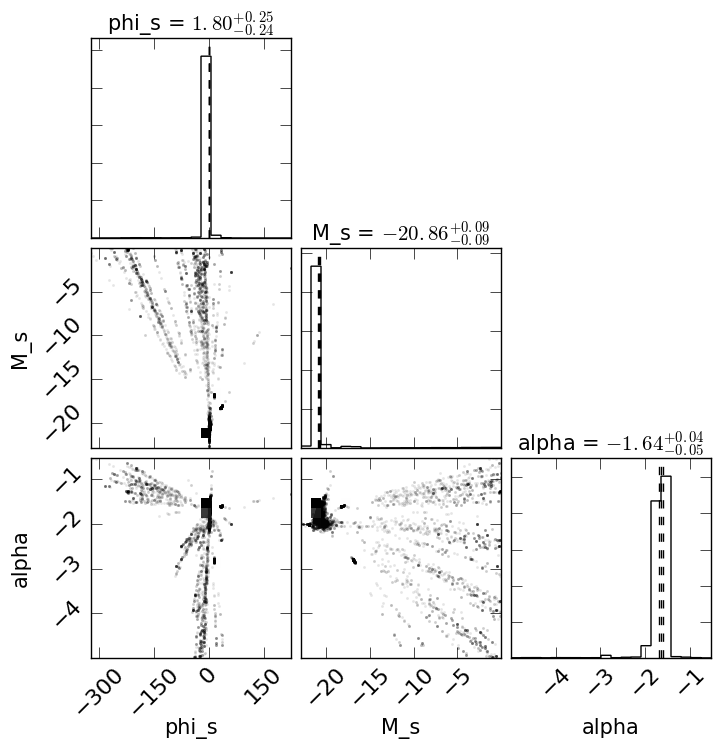

In [5]:
# fit schechter funciton for z=4,6,8 seperately
M, n_obs, ne_obs = np.loadtxt('z4.txt', unpack=True)
theta0 = [1, -20, -2]
mcmc_schechter(theta0, M, n_obs, ne_obs)

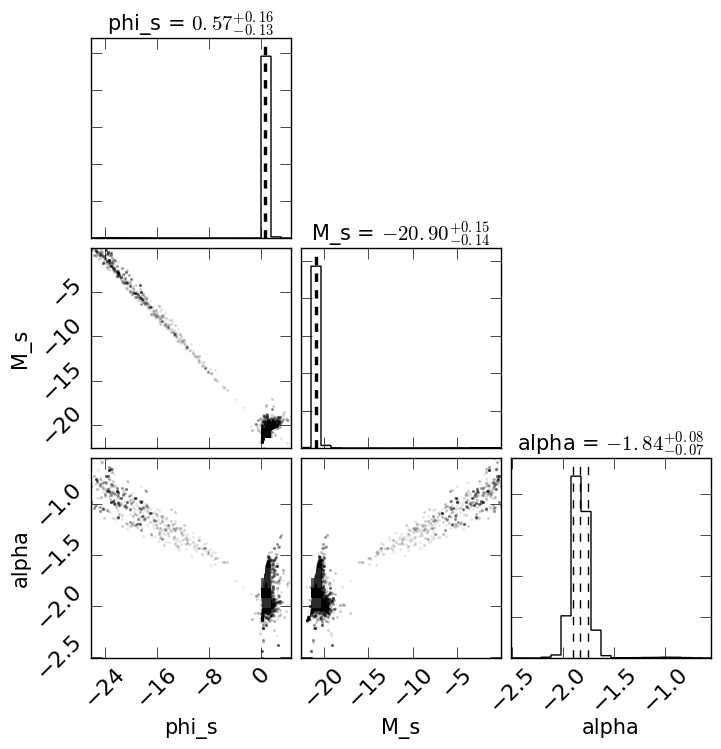

In [6]:
M, n_obs, ne_obs = np.loadtxt('z6.txt', unpack=True)
theta0 = [1, -20, -2]
mcmc_schechter(theta0, M, n_obs, ne_obs)

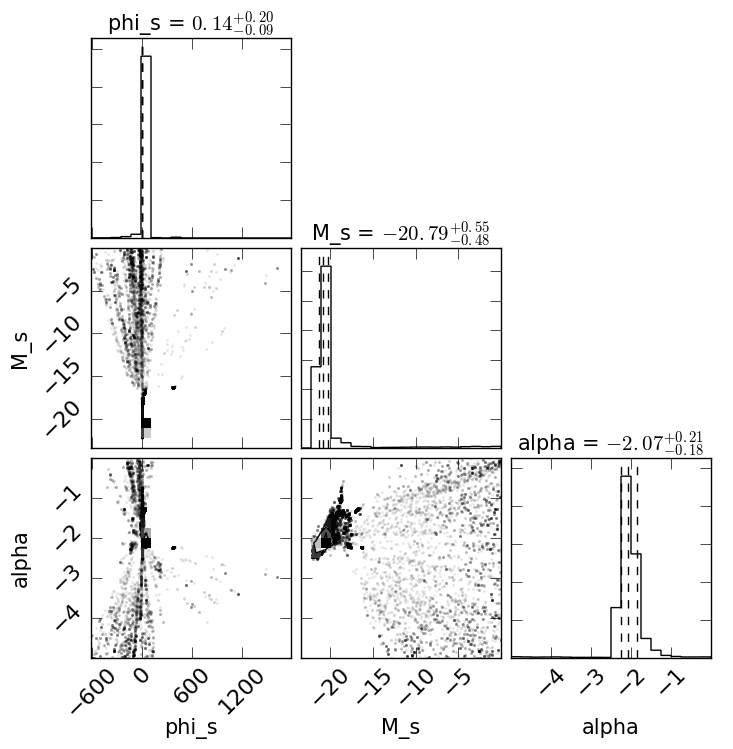

In [7]:
M, n_obs, ne_obs = np.loadtxt('z8.txt', unpack=True)
theta0 = [1, -20, -2]
mcmc_schechter(theta0, M, n_obs, ne_obs)

From my mcmc, for z=4, the best fit is: phi = 1.8 +/- 0.25, M_s = -20.96 +/- 0.09, alpha = 1.64 +/- 0.05. 

for z=6, the best fit is: phi = 0.57 +/- 0.16, M_s = -20.9 +/- 0.15, alpha = -1.84 +/- 0.08

for z=8, phi = 0.14 +/- 0.2, M_s = -20.79 +/- 0.55, alpha = -2.07 +/- 0.21

They all agree with Bouwens et al. paper within uncertainty.